# Original Code submitted

True

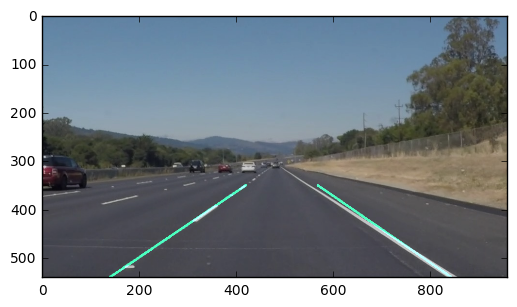

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
import math

def save_plot(dir_name, name, img):
    cv2.imwrite(str.join(dir_name, name,".jpg"), img)
    
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=(0,255,110), thickness=3):
    right_slope=[]
    left_slope=[]
    left_lines=[]
    right_lines=[]
    sort_left_top_y=0
    sort_left_bottom_y=0
    sort_left_top_x=0
    sort_left_bottom_x=0
    start_left_calc_top_x=0
    start_left_calc_bottom_x=0
    sort_right_top_y=0
    sort_right_bottom_y=0
    sort_right_top_x=0
    sort_right_bottom_x=0
    start_right_calc_top_x=0
    start_right_calc_bottom_x=0
    upper_y_limit = 350 #the limit to which we want the line to extend and extrapolated
    lower_y_limit = image.shape[0] #bottom most point of the image in y axis
    max_slope = (upper_y_limit/(image.shape[1]*0.5)) #(y/(x/2)), since we are considering only one half of the triangle
    for line in lines:
        #print('line is',lines)
        for x1, y1, x2, y2 in line:
            m = ((y1-y2)/(x1-x2)) # slope
            #print('m',m)
            if m <= -0.5 and m >= -0.9: #-0.3 earlier
                left_slope.append(m)
                left_lines.append((x1,y1))
            elif m >= 0.6 and m <= 0.8: # 0.2 earlier
                right_slope.append(m)
                right_lines.append((x2,y2))

    #print('left_slope',left_slope)
    #print('rigt_slope',right_slope)
    #print('left_lines',left_lines)
    #print('right_lines',right_lines)
    # average left and right slopes
    if len(right_slope)>0:
        right_slope = sorted(right_slope)[int(len(right_slope)/2)]
        #print('average_right_slope',right_slope)
    if len(left_slope)>0:
        left_slope = sorted(left_slope)[int(len(left_slope)/2)]
        #print('average_left_slope',left_slope)
    
    if len(left_lines)>0:
        sort_left_min_point=min(sorted(left_lines[:],reverse=False))
        sort_left_max_point=max(sorted(left_lines[:],reverse=True))
        sort_left_top_y=sort_left_max_point[1]
        sort_left_bottom_y=sort_left_min_point[1]
        sort_left_top_x=sort_left_max_point[0]
        sort_left_bottom_x=sort_left_min_point[0]
        #print('sort_left_top_y',sort_left_top_y)
        #print('sort_left_bottom_y',sort_left_bottom_y)
        #print('sort_left_top_x',sort_left_top_x)
        #print('sort_left_bottom_x',sort_left_bottom_x)
        start_left_calc_top_x = int((upper_y_limit- sort_left_top_y)/(left_slope))+sort_left_top_x
        start_left_calc_bottom_x = int((lower_y_limit- sort_left_bottom_y)/(left_slope))+sort_left_bottom_x
        #print('Start_Left_Calc_top_x',start_left_calc_top_x)
        #print('Start_Left_Calc_bottom_x',start_left_calc_bottom_x)
        #start_left_y = sorted([line[1] for line in left_lines])[int(len(left_lines)/2)]
        #start_left_x = [line[0] for line in left_lines if line[1] == start_left_y][0]
        #end_left_x = int((img.shape[1]-start_left_y)/left_slope) + start_left_x
        #print('start_left_y',start_left_y)
        #print('start_left_x',start_left_x)
        #print('end_left_x',end_left_x)
    else: 
        start_left_y=0
        start_left_x=0
        end_left_x=0
    
    if len(right_lines)>0:
        sort_right_min_point=min(sorted(right_lines[:],reverse=False))
        sort_right_max_point=max(sorted(right_lines[:],reverse=True))
        sort_right_top_y=sort_right_max_point[1]
        sort_right_bottom_y=sort_right_min_point[1]
        sort_right_top_x=sort_right_max_point[0]
        sort_right_bottom_x=sort_right_min_point[0]
        #print('sort_right',sort_left)
        #print('sort_right_top_y',sort_right_top_y)
        #print('sort_right_bottom_y',sort_right_bottom_y)
        #print('sort_right_top_x',sort_right_top_x)
        #print('sort_right_bottom_x',sort_right_bottom_x)
        start_right_calc_top_x = int((upper_y_limit- sort_right_top_y)/(right_slope))+sort_right_top_x
        start_right_calc_bottom_x = int((lower_y_limit- sort_right_bottom_y)/(right_slope))+sort_right_bottom_x
        #print('Start_right_calc_top_x',start_right_calc_top_x)
        #print('Start_right_calc_bottom_x',start_right_calc_bottom_x)        
        #start_right_y = sorted([line[1] for line in right_lines])[int(len(right_lines)/2)]
        #start_right_x = [line[0] for line in right_lines if line[1] == start_right_y][0]
        #end_right_x = int((img.shape[1]-start_right_y)/right_slope) + start_right_x
        #print('start_right_y',start_right_y)
        #print('start_right_x',start_right_x)
        #print('end_right_x',end_right_x)
    else:
        start_right_y=0
        start_right_x=0
        end_right_x=0
        
        # Drawing the line next     
    
    cv2.line(img, (start_left_calc_top_x, upper_y_limit), (start_left_calc_bottom_x, lower_y_limit), color, thickness)
    cv2.line(img, (start_right_calc_top_x, upper_y_limit), (start_right_calc_bottom_x, lower_y_limit), color, thickness)
    #cv2.line(img, (start_left_top_x_s, upper_y_limit), (start_left_bottom_x_s, lower_y_limit),[255,0,0], thickness)
    #cv2.line(img, (start_right_x, start_right_y), (end_right_x, img.shape[1]), color, thickness)

def draw_lines_ori(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        print('Lines',line)
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

def process_image(image):
    #printing out some stats and plotting
    #print('This image is:', type(image), 'with dimensions:', image.shape)
    plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

    xsize=image.shape[1]
    ysize=image.shape[0]
    #print('x_dimension of the picture is',xsize)
    #print('y_dimension of the picture is',ysize)

    gray = grayscale(image)

    kernel_size = 5
    blur_gray = gaussian_blur(gray, kernel_size)
    plt.imshow(blur_gray,cmap='Greys_r')

    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)

    plt.imshow(edges, cmap='Greys_r')

    left_bottom = [100, 539]
    right_bottom = [940, 539]
    left_top = [440, 320]
    right_top = [540, 320]
    vertices_points=np.array([[left_bottom,right_bottom,right_top,left_top]], dtype=np.int32);
    #vertices = np.array([[(20,540),(330, 335), (550, 335), (940,540)]], dtype=np.int32)
    #vertices = np.array([[(110,imshape[0]),(410, 310),(480, 310), (imshape[1],imshape[0])]], dtype=np.int32)
    x = [left_bottom[0], right_bottom[0], right_top[0], left_top[0], left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], right_top[1], left_top[1], left_bottom[1]]

    masked_img=region_of_interest(edges, vertices_points)

    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 5     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 10 #minimum number of pixels making up a line
    max_line_gap = 5    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    lines = hough_lines(masked_img, rho, theta, threshold,
                                min_line_length, max_line_gap)
    #plt.imshow(lines)
    final_image=weighted_img(lines,image, α=0.8, β=1., λ=0.)
    #print('lines value',lines)

    plt.imshow(final_image)
    #plt.plot(x, y, 'b--', lw=2)
    return final_image

import os
os.listdir("test_images/")
dir_name="pipeline/"
name="Solidwhite_pipe"
image = mpimg.imread('test_images/solidWhiteRight.jpg')

Output=process_image(image)#reading in an image
plt.imshow(Output)
cv2.imwrite('SolidwhiteRight_pipe_santo.jpg',Output)

# Code V2, using length as weighting.

line is [[504 320 854 538]]
m 0.622857142857 b 1189.09714286 l 1
line is [[521 331 853 539]]
m 0.626506024096 b 1190.68674699 l 1
line is [[498 320 822 531]]
m 0.651234567901 b 1167.80555556 l 1
line is [[499 320 719 463]]
m 0.65 b 1019.95 l 1
line is [[651 420 832 538]]
m 0.651933701657 b 1182.74033149 l 1
line is [[500 320 626 402]]
m 0.650793650794 b 887.619047619 l 1
line is [[310 423 458 320]]
m -0.695945945946 b 235.297297297 l 1
line is [[319 425 464 320]]
m -0.724137931034 b 232.275862069 l 1
line is [[736 476 831 538]]
m 0.652631578947 b 1182.11578947 l 1
line is [[310 422 457 323]]
m -0.673469387755 b 239.469387755 l 1
line is [[531 338 683 433]]
m 0.625 b 953.625 l 1
left_m_weight_sum -2.09355326474 left_b_weight_sum 2050.95745288 left_length_sum 3
right_m_weight_sum 5.13095666625 right_b_weight_sum 3666.36038601 right_length_sum 8
left_m -0.697851088245 left_b 683.652484293 left_length 3
right_m 0.641369583282 right_b 458.295048252 right_length 8
left_top_x 439 upper_y_limi

True

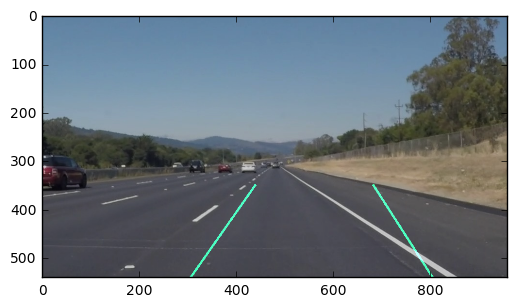

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
import math

def save_plot(dir_name, name, img):
    cv2.imwrite(str.join(dir_name, name,".jpg"), img)
    
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=(0,255,110), thickness=3):

    global xsize 
    global ysize
    #declarations
    upper_y_limit = 350 #the limit to which we want the line to extend and extrapolated
    lower_y_limit = image.shape[0] #bottom most point of the image in y axis
    left_m_weight_sum = 0
    left_b_weight_sum = 0
    left_lenght_sum = 0
    right_m_weight_sum = 0
    right_b_weight_sum = 0
    right_lenght_sum = 0
    
    max_slope = (upper_y_limit/(xsize*0.5)) #(y/(x/2)), since we are considering only one half of the triangle
    for line in lines:
        #print('line is',lines)
        for x1, y1, x2, y2 in line:
            print('line is',line)
            m = ((y2-y1)/(x2-x1)) # slope
            b = x2 + (m)*y2 # intercept
            l = 1 #np.sqrt((y2-y1)**2+(x2-x1)**2) #length of the line
            print('m',m,'b',b,'l',l)
            if (x1+x2)/2 < xsize/2 and abs(m) >= 0.5: #-0.3 earlier - for left lanes identification
                left_m_weight_sum = left_m_weight_sum + m*l #using lenght as weights
                left_b_weight_sum = left_b_weight_sum +(x2 + abs(m)*y2)*l
                left_lenght_sum = left_lenght_sum + l
                
            elif (x1+x2)/2 > xsize/2 and abs(m) >= 0.5: # 0.2 earlier - for right lane detection
                right_m_weight_sum = right_m_weight_sum + m*l #using lenght as weights
                right_b_weight_sum = right_b_weight_sum + (x2 - abs(m)*y2)*l
                right_lenght_sum = right_lenght_sum + l
    print('left_m_weight_sum',left_m_weight_sum,'left_b_weight_sum',left_b_weight_sum,'left_length_sum',left_lenght_sum)
    print('right_m_weight_sum',right_m_weight_sum,'right_b_weight_sum',right_b_weight_sum,'right_length_sum',right_lenght_sum)
    if (left_lenght_sum)>0:
        left_m = left_m_weight_sum/left_lenght_sum
        left_b = left_b_weight_sum/left_lenght_sum
        left_top_x = int(upper_y_limit*left_m + left_b)
        left_bottom_x = int(lower_y_limit*left_m + left_b)    
    
    if (right_lenght_sum)>0:
        right_m = right_m_weight_sum/right_lenght_sum
        right_b = right_b_weight_sum/right_lenght_sum
        right_top_x = int(upper_y_limit*right_m + right_b)
        right_bottom_x = int(lower_y_limit*right_m + right_b)
        
        # Drawing the line     
    print('left_m',left_m,'left_b',left_b,'left_length',left_lenght_sum)
    print('right_m',right_m,'right_b',right_b,'right_length',right_lenght_sum)
    print('left_top_x',left_top_x,'upper_y_limit',upper_y_limit,'left_bottom_x',left_bottom_x,'lower_y_limit',lower_y_limit)
    print('right_top_x',right_top_x,'upper_y_limit',upper_y_limit,'left_bottom_x',right_bottom_x,'lower_y_limit',lower_y_limit)
    
    cv2.line(img, (left_top_x, upper_y_limit), (left_bottom_x, lower_y_limit), color, thickness)
    cv2.line(img, (right_top_x, upper_y_limit), (right_bottom_x, lower_y_limit), color, thickness)
    #cv2.line(img, (start_left_top_x_s, upper_y_limit), (start_left_bottom_x_s, lower_y_limit),[255,0,0], thickness)
    #cv2.line(img, (start_right_x, start_right_y), (end_right_x, img.shape[1]), color, thickness)

def draw_lines_ori(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        print('Lines',line)
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            
            
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

def process_image(image):
    #printing out some stats and plotting
    #print('This image is:', type(image), 'with dimensions:', image.shape)
    plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

    
    #print('x_dimension of the picture is',xsize)
    #print('y_dimension of the picture is',ysize)

    gray = grayscale(image)

    kernel_size = 5
    blur_gray = gaussian_blur(gray, kernel_size)
    plt.imshow(blur_gray,cmap='Greys_r')

    low_threshold = 50
    high_threshold = 150
    edges = canny(blur_gray, low_threshold, high_threshold)

    plt.imshow(edges, cmap='Greys_r')

    left_bottom = [100, 539]
    right_bottom = [940, 539]
    left_top = [440, 320]
    right_top = [540, 320]
    vertices_points=np.array([[left_bottom,right_bottom,right_top,left_top]], dtype=np.int32);
    #vertices = np.array([[(20,540),(330, 335), (550, 335), (940,540)]], dtype=np.int32)
    #vertices = np.array([[(110,imshape[0]),(410, 310),(480, 310), (imshape[1],imshape[0])]], dtype=np.int32)
    x = [left_bottom[0], right_bottom[0], right_top[0], left_top[0], left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], right_top[1], left_top[1], left_bottom[1]]

    masked_img=region_of_interest(edges, vertices_points)

    rho = 0.1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 10     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 50 #minimum number of pixels making up a line
    max_line_gap = 100    # maximum gap in pixels between connectable line segments
    line_image = np.copy(image)*0 # creating a blank to draw lines on

    lines = hough_lines(masked_img, rho, theta, threshold,
                                min_line_length, max_line_gap)
    #plt.imshow(lines)
    final_image=weighted_img(lines,image, α=0.8, β=1., λ=0.)
    #print('lines value',lines)

    plt.imshow(final_image)
    #plt.plot(x, y, 'b--', lw=2)
    return final_image

import os
os.listdir("test_images/")
dir_name="pipeline/"
name="Solidwhite_pipe"
image = mpimg.imread('test_images/solidWhiteRight.jpg')
xsize=image.shape[1]
ysize=image.shape[0]
Output=process_image(image)#reading in an image
plt.imshow(Output)
cv2.imwrite('SolidwhiteRight_pipe_santo.jpg',Output)